In [34]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.constraints import unit_norm
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model

In [35]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

Train labels:  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


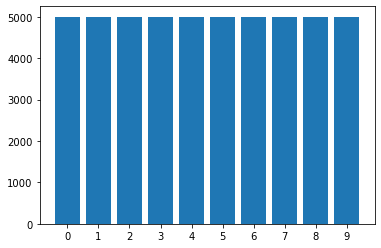

In [36]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

plt.bar(unique, counts)
plt.xticks(unique, unique)
plt.show()

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


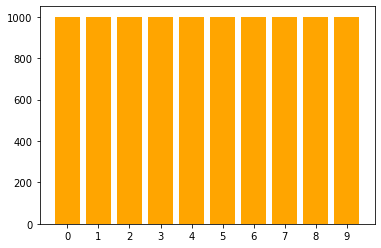

In [37]:

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

plt.bar(unique, counts, color='orange')
plt.xticks(unique, unique)
plt.show()

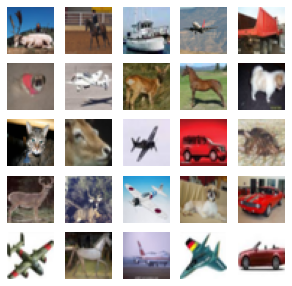

In [38]:
# sample 25 cifar10 digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 cifar10 digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

In [39]:
# convert to one-hot vector
# e.g. 3 -> [0 0 0 1 0 0 0 0 0 0]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = 3 * image_size * image_size

# resize and normalize from range -1 to 1
x_train = np.reshape(x_train, [-1, input_size])
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = np.reshape(x_test, [-1, input_size])
x_test = (x_test.astype('float32') - 127.5) / 127.5

In [41]:
# hyper-parameters
batch_size = 128
n_units = 256
epochs = 50

In [42]:
# model is a 3-layer MLP
model = Sequential(name='7-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='softplus', name='input_layer'))
model.add(Dense(n_units*2, activation='elu', name='hidden_layer_1', kernel_constraint=unit_norm()))
model.add(Dense(n_units*4, activation='softsign', name='hidden_layer_2', kernel_constraint=unit_norm()))
model.add(Dense(n_units*8, activation='elu', name='hidden_layer_3', kernel_constraint=unit_norm()))
model.add(Dense(n_units*4, activation='softsign', name='hidden_layer_4', kernel_constraint=unit_norm()))
model.add(Dense(n_units*2, activation='elu', name='hidden_layer_5', kernel_constraint=unit_norm()))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "7-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               131584    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 1024)              525312    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 2048)              2099200   
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 1024)              2098176   
_________________________________________________________________
hidden_layer_5 (Dense)       (None, 512)               524800    
_________________________________________________________________
output_layer (Dense)         (None, 10)                

In [43]:
# loss function for one-hot vector
# use of sgd optimizer with default lr=0.01
# accuracy is a good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test,
                           y_test, 
                           batch_size=batch_size,
                           verbose=False)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/50
391/391 [==============================] - 46s 118ms/step - loss: 1.9339 - accuracy: 0.3133 - val_loss: 1.7814 - val_accuracy: 0.3658
Epoch 2/50
391/391 [==============================] - 46s 118ms/step - loss: 1.7261 - accuracy: 0.3891 - val_loss: 1.6718 - val_accuracy: 0.4105
Epoch 3/50
391/391 [==============================] - 46s 117ms/step - loss: 1.6360 - accuracy: 0.4207 - val_loss: 1.6079 - val_accuracy: 0.4387
Epoch 4/50
391/391 [==============================] - 46s 118ms/step - loss: 1.5752 - accuracy: 0.4442 - val_loss: 1.5677 - val_accuracy: 0.4454
Epoch 5/50
391/391 [==============================] - 46s 117ms/step - loss: 1.5305 - accuracy: 0.4589 - val_loss: 1.5389 - val_accuracy: 0.4558
Epoch 6/50
391/391 [==============================] - 43s 110ms/step - loss: 1.4948 - accuracy: 0.4709 - val_loss: 1.4951 - val_accuracy: 0.4739
Epoch 7/50
391/391 [==============================] - 46s 118ms/step - loss: 1.4594 - accuracy: 0.4839 - val_loss: 1.4950 - val_ac

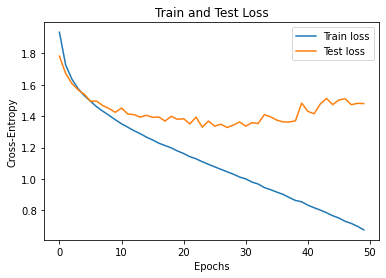

In [44]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

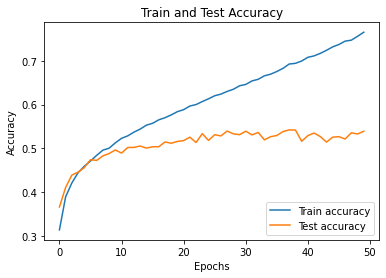

In [45]:
# Plot history: Loss and accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()